# Xử lý ảnh hình thái và đếm số lượng đối tượng

# Các phép toán hình thái học cơ bản

1. Erosion (Co ngắt): Thu nhỏ kích thước của đối tượng trong ảnh
2. Dilation(Co giãn): Mở rộng kích thước của đối tượng trong ảnh
3. Opening: Thực hiện erosion sau đó dilation => giúp loại bỏ nhiễu và nối các objects -> Loại bỏ đặc trưng nhỏ k cần thiết từ ảnh X-quang
4. Closing: Thực hiện dilation sau đó erosion, giúp lấp đầy lỗ và loại bỏ nhiễu -> Xử lý ảnh y khoa để phát hiện các khối u

Morphology, hình thái học là một phần quan trọng của xử lý ảnh, tập trung và việc xử lý HÌNH DẠNG và CẤU TRÚC của đối tượng trong ảnh.

=> Chúng ta thường làm việc với ảnh NHỊ PHÂN, pixel có gtri 0(đen) đến 1(trắng)

## Dùng thư viện Scipy-Numpy-Matplotlib

In [1]:
from library import *

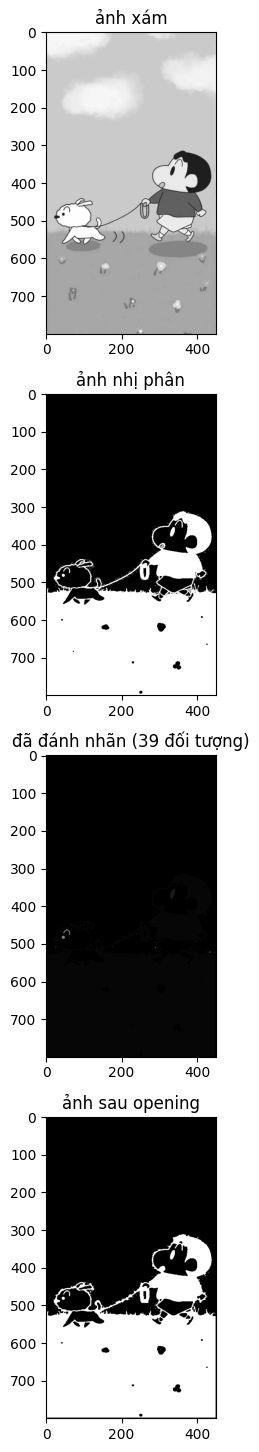

In [18]:
from scipy import ndimage


img = Image.open("C:\\Users\\nguye\\OneDrive\\Documents\\Nguyễn Quang Nhật\\Quang Nhat\\anh-hoat-hinh-6.jpg")

# Anhr xám hoặc không
gray_image = img.convert('L')

# Chuyển ảnh xám về mảng
img_a = np.array(gray_image)

# Chuyển sang ảnh nhị phân
binary_image = 1*(img_a<200) # điểm<200 quy về 1, lớn hơn quy về 0, can change

# Thực hiện Opening để loại bỏ nhiễu và nối các đối tượng
opened_image = ndimage.binary_closing(binary_image, structure=np.ones((3,3)))

# Đánh nhãn
labeled_image, num_features = ndimage.label(opened_image)

# Tạo lưới subplot với 3 dòng và 1 cột
fig, axs = plt.subplots(4, 1, figsize=(18, 18))

plt.subplot(4,1,1)
plt.imshow(gray_image, cmap='gray')
plt.title('ảnh xám')

plt.subplot(4,1,2)
plt.imshow(binary_image, cmap='gray')
plt.title('ảnh nhị phân')

plt.subplot(4,1,3)
plt.imshow(labeled_image, cmap='gray') # cmap='nipy_spectral'
plt.title(f'đã đánh nhãn ({num_features} đối tượng)')

plt.subplot(4,1,4)
plt.imshow(opened_image, cmap='gray') 
plt.title('ảnh sau opening')
plt.show()
